In [1]:
from variations import *
import variations
reload(variations)

<module 'variations' from 'variations.pyc'>

In [2]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to ROOTaaS 6.06/06
purities:
[ 0.36229415  0.51547468  0.509     ]
[ 0.04815976  0.048       0.048     ]
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
['../InputData/pT_Rebin_3_Cut/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_3_Cut/pPb_SE_L0_Correlation_GMB_Ratio.root']
purities:
[ 0.36229415  0.51547468  0.509     ]
[ 0.04815976  0.048       0.048     ]
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
['../InputData/pT_Rebin_3_Cut/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_3_Cut/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [3]:
Ldphi = [0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431]
print(Ldphi[6:])
print(len(Ldphi))

[1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431]
14


In [4]:
sdphi = [0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
print(sdphi[3:])

[1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]


In [5]:
Corrs = ROOT_to_nparray()
print(len(Corrs["p-Pb_CSR"][2][2]))

7


In [6]:
Show_Plots = False
if (Ped_Sub_First):
    if (Show_Plots):
        Plot_UB()
        Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)
    
else:
    Correlated_Subtraction(Corrs)
    if (Show_Plots):
        Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

In [7]:
#Plot_pp_pPb_Cs(Corrs)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [8]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

In [9]:
reload(functions_fragmentation)
from functions_fragmentation import *
print(Frags["pp_FF"][2])

[ 4.62460288  1.71215757  1.6201809   0.29410646 -0.08694303  0.01707088
         nan]


**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [10]:
Combined_Frags = Average_FF(Frags)

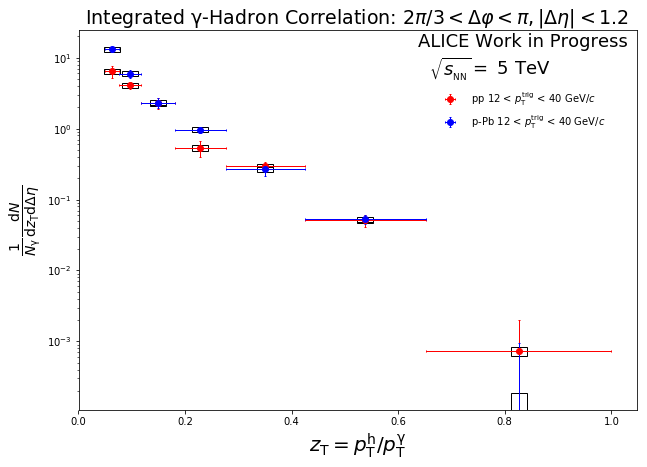

                    pp Central Values:
[  6.39681464e+00   4.08250253e+00   2.29303538e+00   5.33889710e-01
   2.95192907e-01   5.06405774e-02   7.29898569e-04]

                    pp Stat. Uncertainty:
[ 1.2028598   0.48839336  0.3938687   0.1298251   0.03985794  0.0092854
  0.00124196]

                    p-Pb Central Values:
[  1.30859439e+01   5.97734682e+00   2.32282371e+00   9.63581953e-01
   2.66335713e-01   5.30903112e-02  -2.60682017e-06]

                    p-Pb Stat. Uncertainty:
[  1.06907828e+00   7.72527995e-01   3.65712879e-01   9.52075622e-02
   5.18077818e-02   7.34592864e-03   9.67602792e-04]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 12\%-170\% & -37117\%-19\% \\
\hline
Purity & 6\%-13\% & -7331\%-8\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [11]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

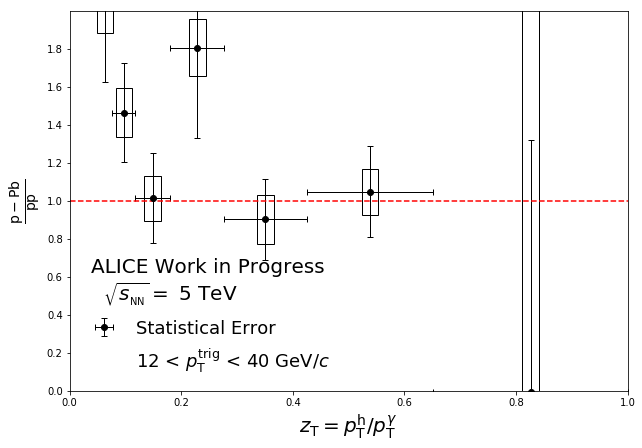

                Central Values:
[ 2.0456969   1.46413794  1.01299079  1.80483335  0.90224293  1.04837492
 -0.00357148]

                Ratio Uncertainty from Purity:
[  7.53428441e-02   7.71408111e-02   9.49018221e-02   7.61036044e-02
   1.10746081e-01   9.50189115e-02   8.17736546e+01]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.14465261  0.10353019  0.07162927  0.12762099  0.06379821  0.0741313
 -0.00025254]

                Full Systematic Uncertainty:
[  0.16309789   0.12910927   0.11889957   0.14858962   0.12780808
   0.12051574  81.77365459]

****************************************
Minimizer is Linear
Chi2                      =       9.6993
NDf                       =            5
p0                        =      1.18761   +/-   0.110241    

****************************************
Minimizer is Linear
Chi2                      =      6.79239
NDf                       =            4
p0                        =      1.49184   +/-   0.209742    
p1      

In [12]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [13]:
reload(functions_correlations)
from functions_correlations import *

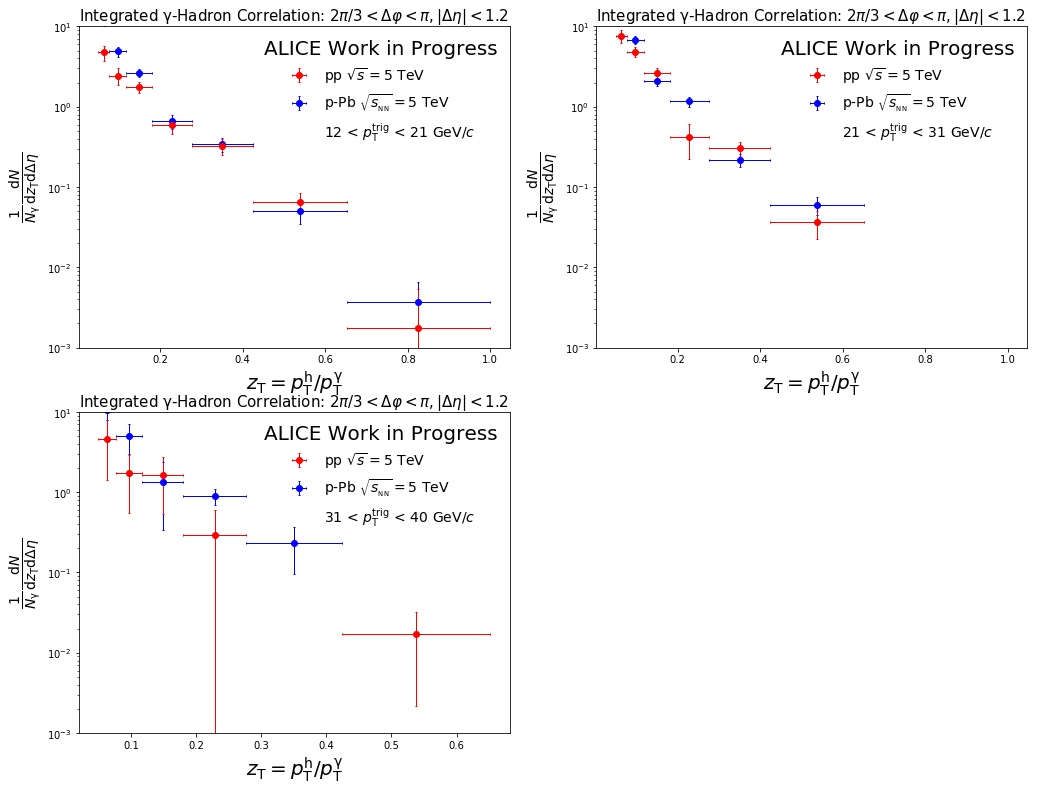

In [14]:
Plot_FF(Frags)

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

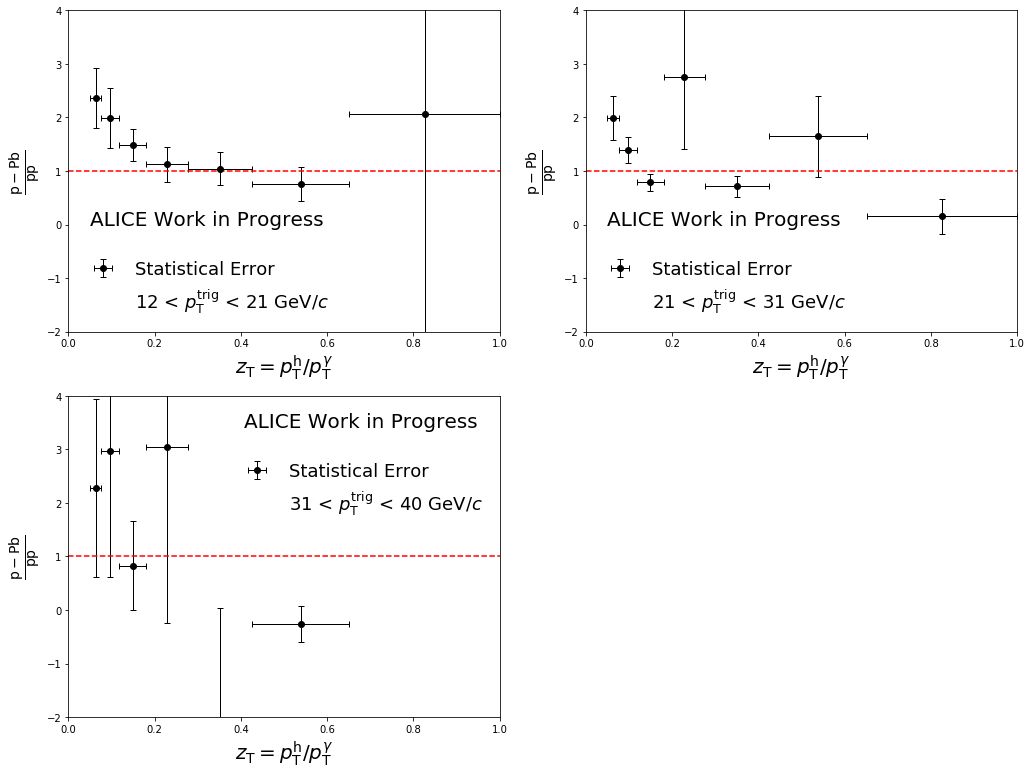

In [16]:
FF_Ratio(Frags)

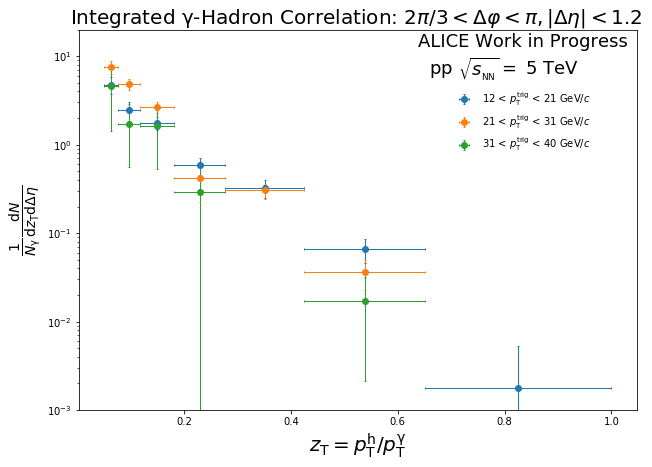

                             PROTON-PROTON:
Central Values
[[  4.76644996e+00   2.44009672e+00   1.75781785e+00   5.85639399e-01
    3.24188102e-01   6.56328331e-02   1.77933800e-03]
 [  7.57916250e+00   4.84777692e+00   2.66244355e+00   4.21409327e-01
    3.04045983e-01   3.62248289e-02  -4.59525162e-04]
 [  4.62460288e+00   1.71215757e+00   1.62018090e+00   2.94106462e-01
   -8.69430254e-02   1.70708827e-02              nan]]
Statistical Errors (Relative)
[[ 0.21295743  0.24423429  0.1618527   0.22114313  0.23047938  0.29182307
   2.01880441]
 [ 0.17835319  0.13832111  0.13687242  0.46533744  0.19588959  0.37726556
  -2.15289847]
 [ 0.6893869   0.67658894  0.67116283  1.05603379 -0.82682463  0.8735077
          nan]]
Relative Uncertainty from Purity
[[  7.46447328e-01   3.82130031e-01   2.75282116e-01   9.17137425e-02
    5.07693029e-02   1.02783944e-02   2.78652269e-04]
 [  8.31450232e-01   5.31811429e-01   2.92075715e-01   4.62294986e-02
    3.33544904e-02   3.97394071e-03  -5.0410

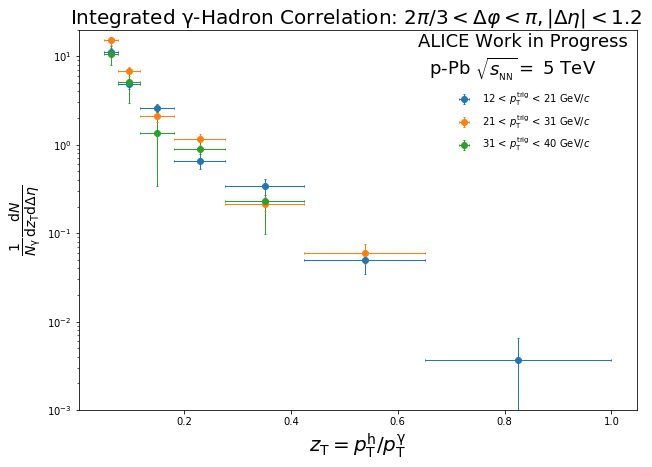

                              PROTON-LEAD:
Central Values
[[  1.12817544e+01   4.87763552e+00   2.61804319e+00   6.58826701e-01
    3.39066022e-01   4.97688306e-02   3.66109164e-03]
 [  1.50885076e+01   6.74561507e+00   2.10667226e+00   1.16213271e+00
    2.16259997e-01   5.97836135e-02  -7.01083956e-05]
 [  1.05538957e+01   5.07085735e+00   1.34563284e+00   8.94860016e-01
    2.31980838e-01  -4.37956693e-03              nan]]
Statistical Errors (Relative)
[[ 0.10160035  0.13770149  0.11382685  0.19104949  0.19412789  0.30345636
   0.79288056]
 [ 0.10409394  0.11534136  0.15170741  0.14255653  0.1863261   0.25822351
  -0.        ]
 [ 0.2416756   0.40963261  0.74787258  0.21867209  0.58154823 -1.00196219
          nan]]
Relative Uncertainty from Purity
[[  1.76677307e+00   7.63859481e-01   4.09997243e-01   1.03175200e-01
    5.30992516e-02   7.79402089e-03   5.73343283e-04]
 [  1.65524134e+00   7.40008308e-01   2.31106424e-01   1.27488428e-01
    2.37241812e-02   6.55838944e-03  -7.6910

In [17]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

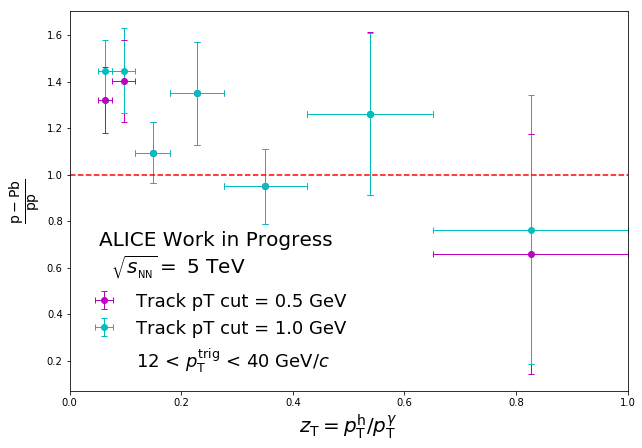

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]


In [18]:
Ratio_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_1zT.npy")
Ratio_Errors_1zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_1zT.npy")
Ratio_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_05zT.npy")
Ratio_Errors_05zt = np.load("npy_files/LO_Averaged_FF_Ratio_Errors_05zT.npy")

Compare_pp_pPB_Avg_Ratio(Ratio_05zt,Ratio_Errors_05zt,"Track pT cut = 0.5 GeV",Ratio_1zt,Ratio_Errors_1zt,"Track pT cut = 1.0 GeV")

In [19]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

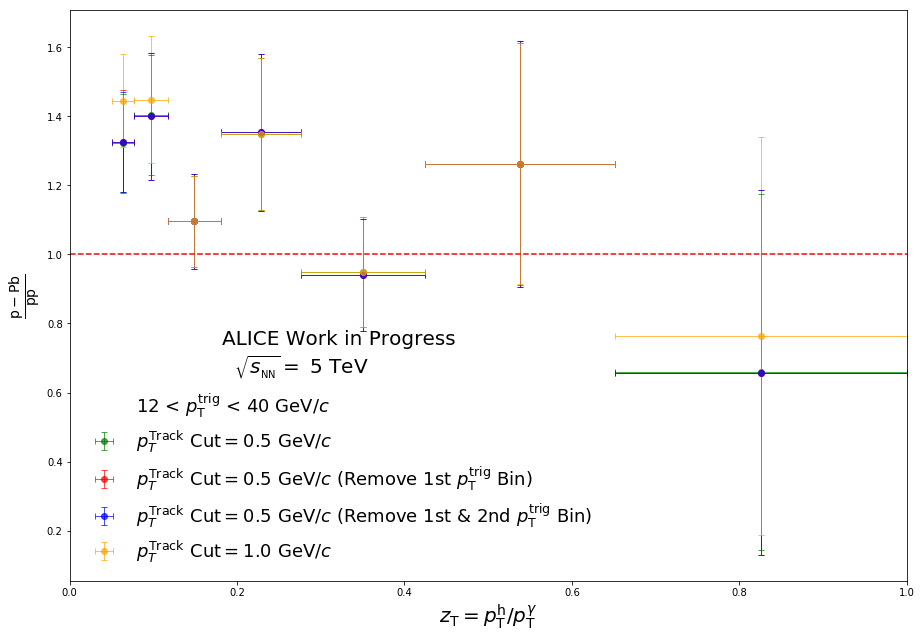

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      6.55659
NDf                       =            6
p0                        =      1.18867   +/-   0.0714348   

****************************************
Minimizer is Linear
Chi2                      =      6.59049
NDf                       =            6
p0                        =      1.19041   +/-   0.070857    

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   


In [20]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

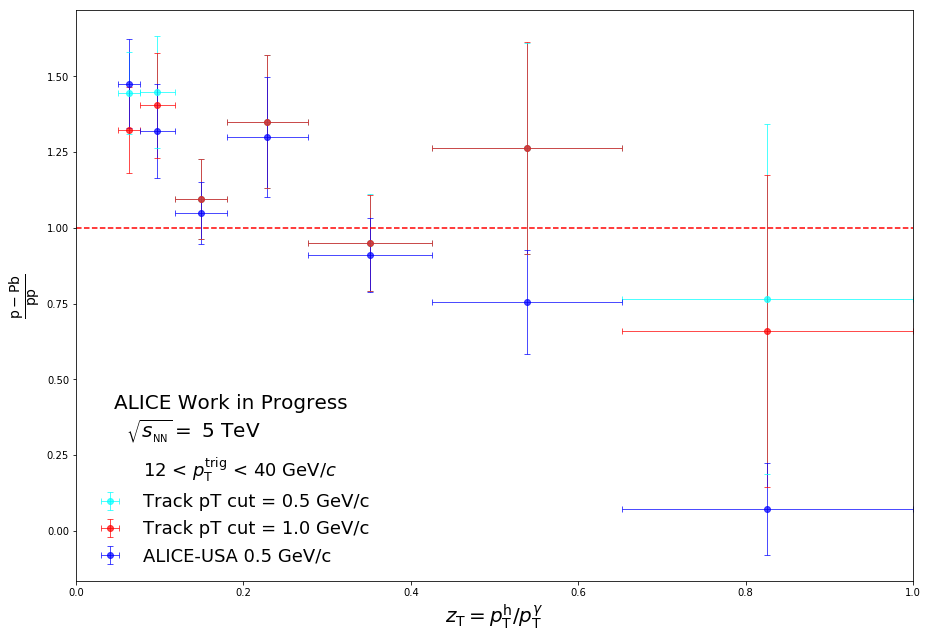

                Central Values:
[ 1.47546927  1.31963154  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      57.1819
NDf                       =            6
p0                        =     0.979532   +/-   0.053191    


In [21]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

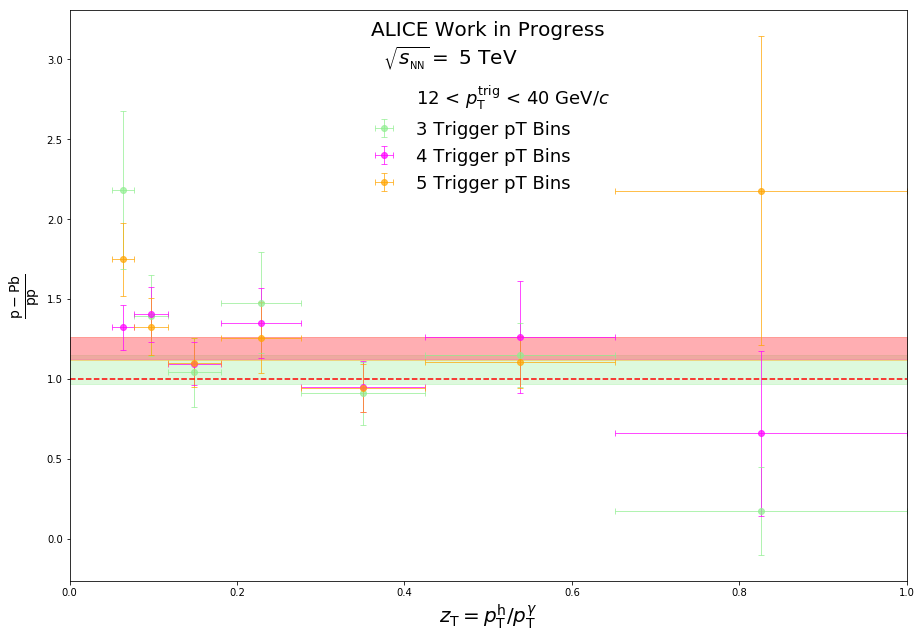

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.10477787
  2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      19.7879
NDf                       =            6
p0                        =      1.05868   +/-   0.093368    

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      10.8027
NDf                       =            6
p0                        =      1.18779   +/-   0.0715211   


In [22]:
strings = ["pT_Rebin_3","05zT","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [23]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


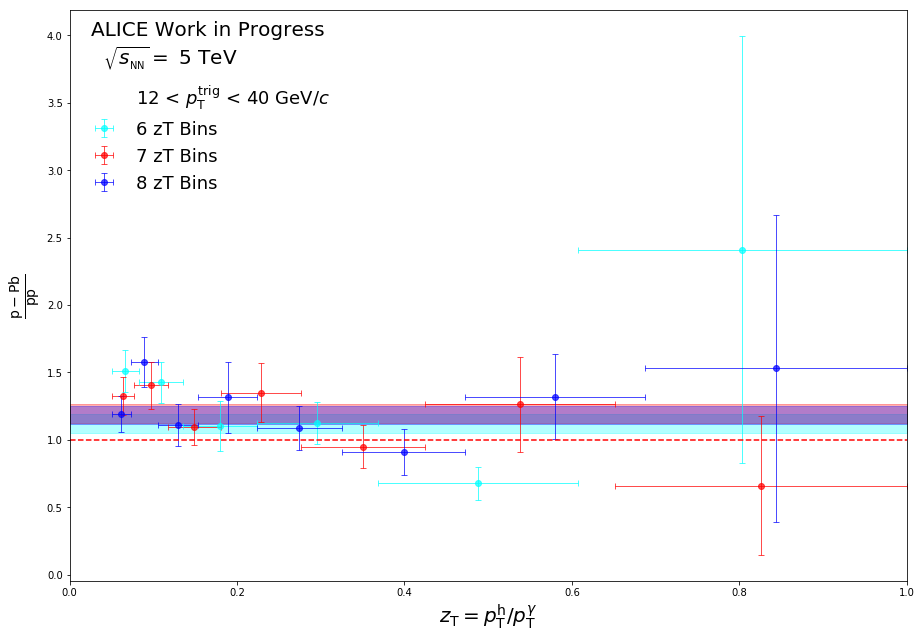

                Central Values:
[ 1.19281029  1.57617169  1.1100219   1.31426036  1.08778698  0.90913137
  1.31994451  1.53097558]

****************************************
Minimizer is Linear
Chi2                      =      23.6267
NDf                       =            5
p0                        =      1.12038   +/-   0.0677459   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      8.12662
NDf                       =            7
p0                        =      1.18291   +/-   0.0673123   


In [24]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins"]
colors = ["cyan","red","blue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


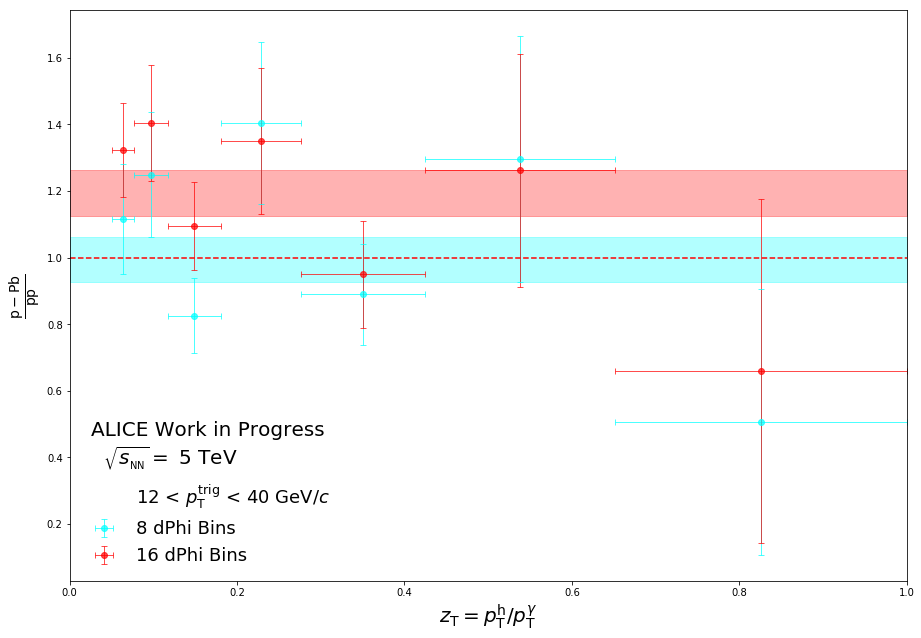

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]

****************************************
Minimizer is Linear
Chi2                      =      10.0649
NDf                       =            6
p0                        =     0.994347   +/-   0.0679332   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   


In [25]:
strings = ["dPhi_Rebin_16","05zT"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)